In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

import missingno as msno

### Data from
https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Referred
https://www.kaggle.com/rnmehta5/pima-indian-diabetes-binary-classification

In [3]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터 살피기

Counter({0: 500, 1: 268})


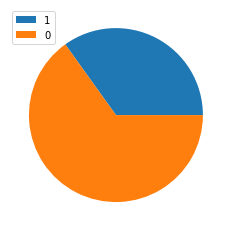

In [4]:
print(Counter(df['Outcome']))
plt.pie(Counter(df['Outcome']).values())
plt.legend(Counter(df['Outcome']).keys())


### 결측치 확인

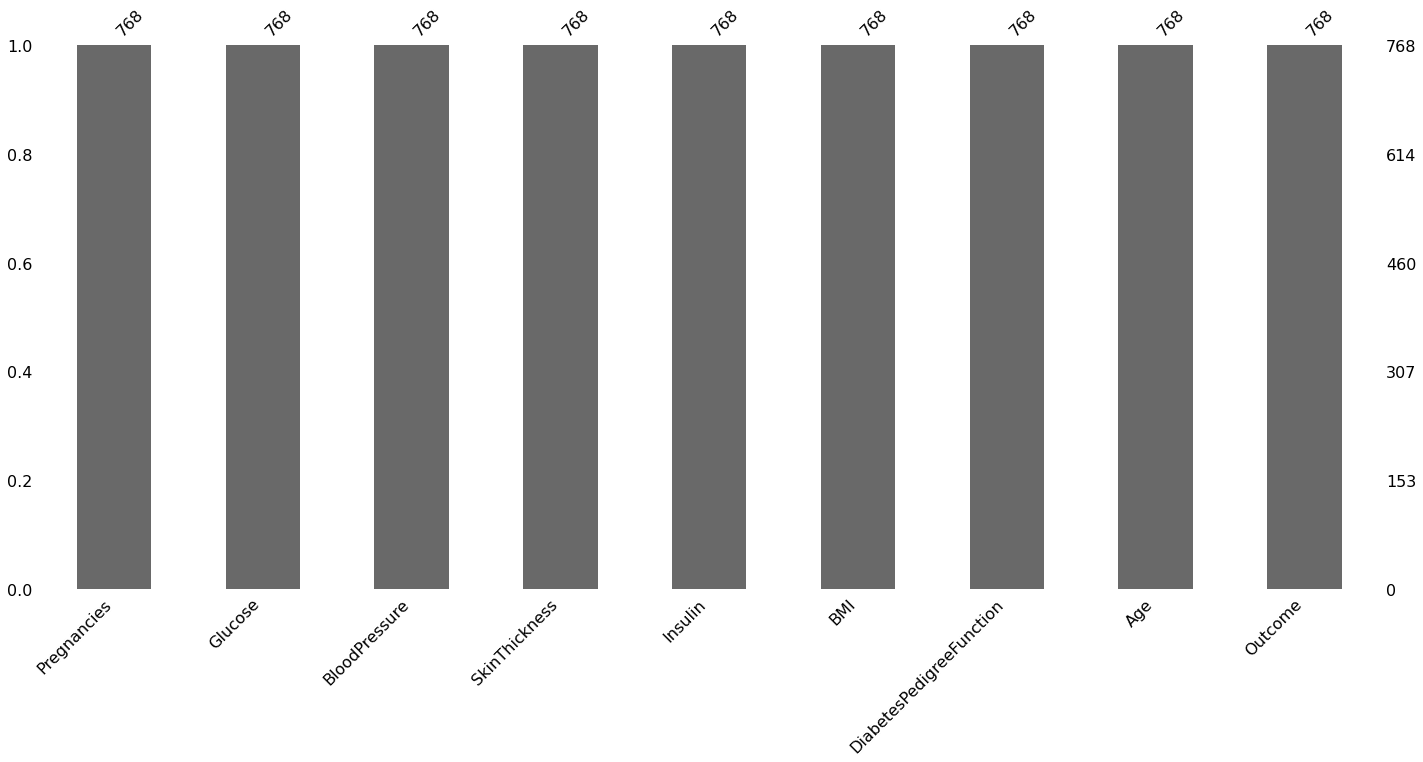

In [5]:
msno.bar(df)

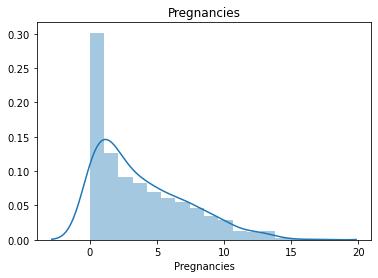

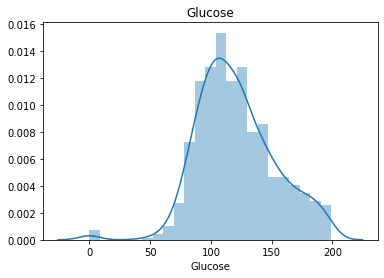

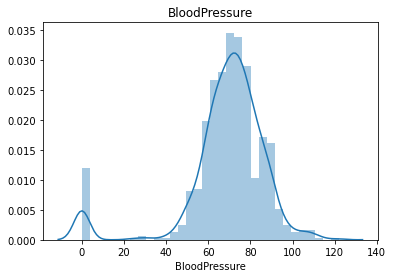

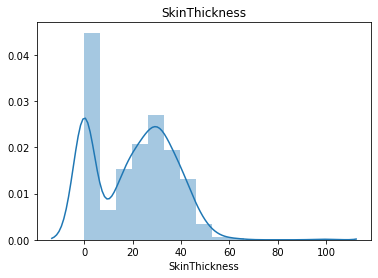

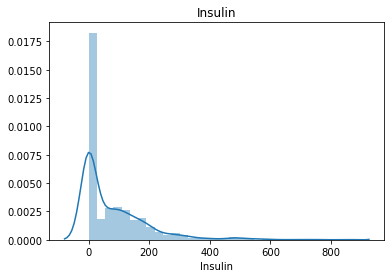

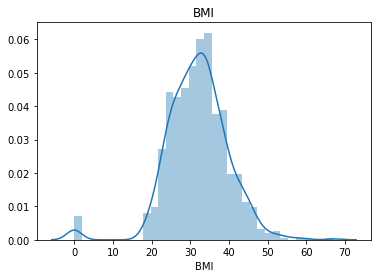

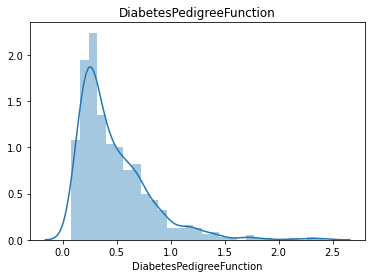

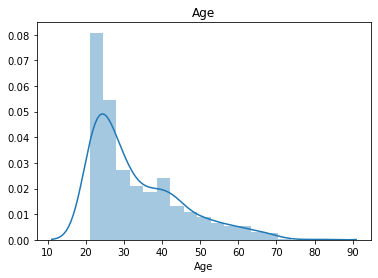

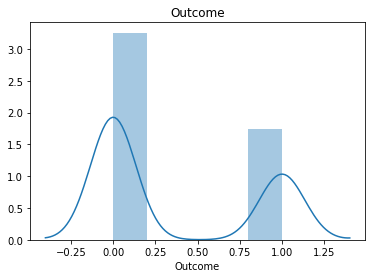

In [6]:
#f, axes = plt.subplots(4, 2, figsize=(7, 7), sharex=True)
# for 문 써서 8개 4*2 로 해보기
for c in df.columns:
    sns.distplot(df.loc[df[c].notnull(),c])#, ax = axes[p])
    plt.title(c)
    plt.show()

    


In [7]:
def mode_key(_df,_var, exceptt):
    dic = Counter(_df[_var])
    sorted_dic = sorted(dic.items(), key = lambda item: item[1], reverse=True)
    mode= sorted_dic[0][0]
    if mode == exceptt: mode = sorted_dic[1][0]
    return mode



## Glucose, BloodPressure, SkinThickness, Insulin, BMI는 0일 수 없음.
### 0 값을 그 변수의 최빈값으로 대치

In [8]:
pars = 'Glucose, BloodPressure, SkinThickness, Insulin, BMI'.split(',')

pars = [x.strip() for x in pars]
pars


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

<ipython-input-9-f7c313cda3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[par][msk] = mode


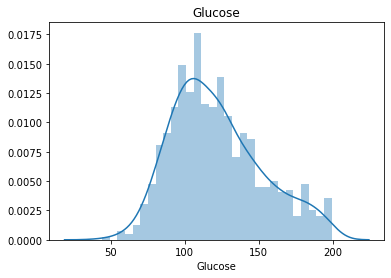

<ipython-input-9-f7c313cda3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[par][msk] = mode


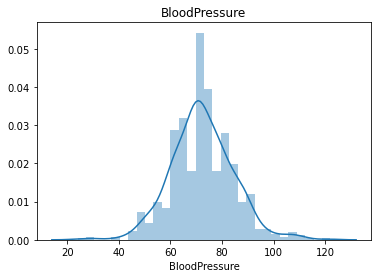

<ipython-input-9-f7c313cda3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[par][msk] = mode


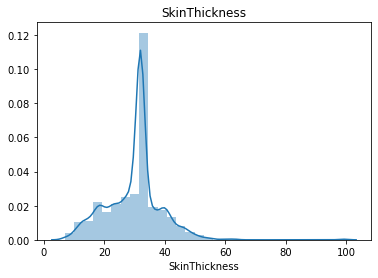

<ipython-input-9-f7c313cda3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[par][msk] = mode


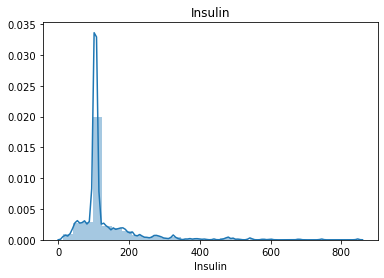

<ipython-input-9-f7c313cda3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[par][msk] = mode


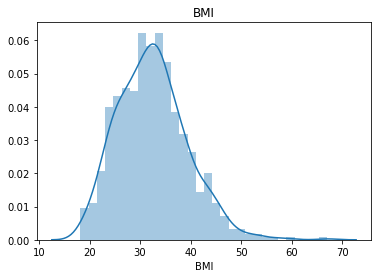

In [9]:
for par in pars:
    msk = df[par]==0
    mode = mode_key(df,par,exceptt=0)
    df[par][msk] = mode
    sns.distplot(df[par],bins=30)#, ax = axes[p])
    plt.title(par)
    plt.show()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


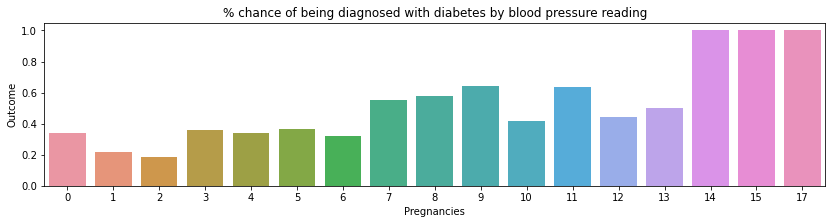

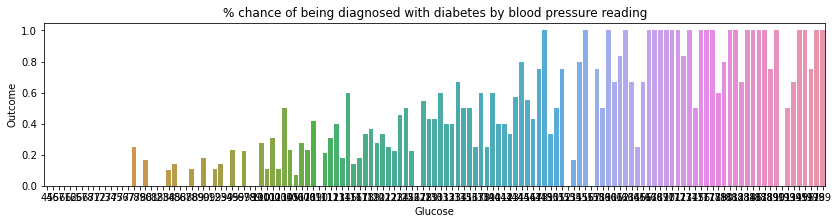

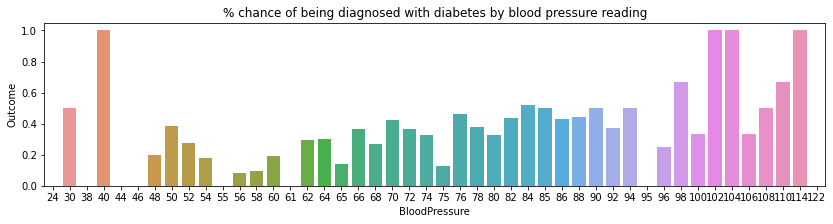

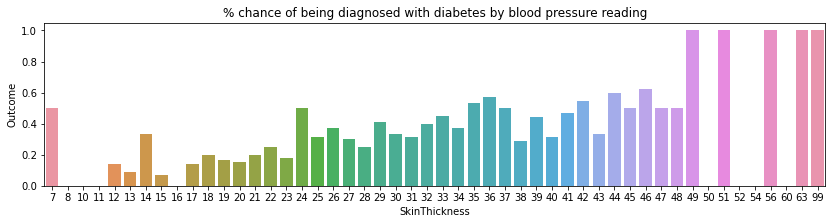

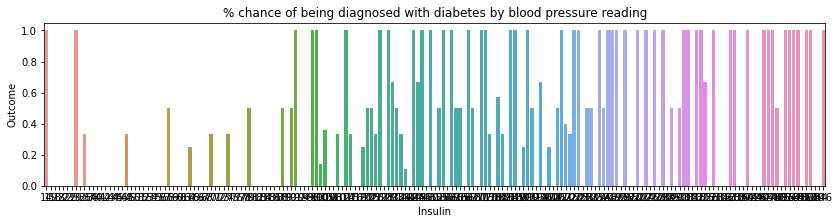

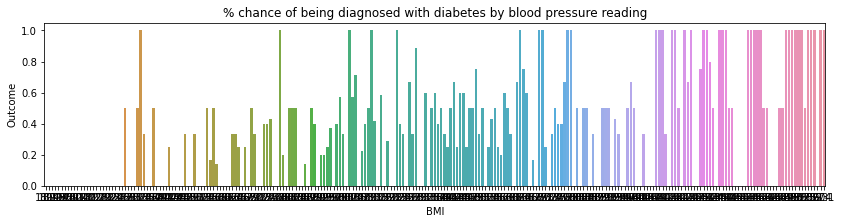

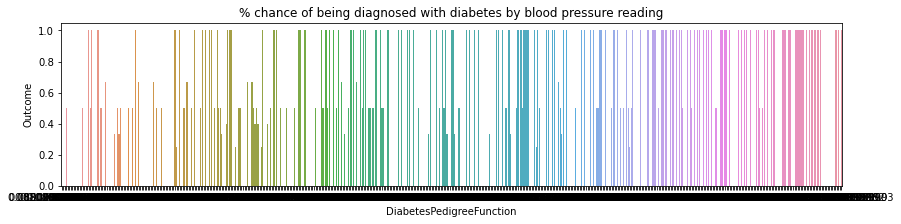

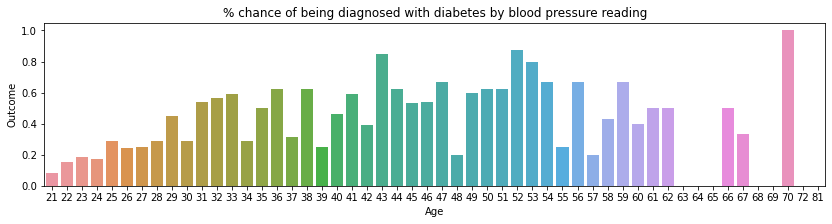

In [10]:
print(df.columns)
for var in df.columns.to_list()[:-1]:
    plt.figure(figsize=(14,3))
    # 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
    bp_pivot = df.groupby(var).Outcome.mean().reset_index()
    sns.barplot(bp_pivot[var], bp_pivot.Outcome)
    plt.title('% chance of being diagnosed with diabetes by blood pressure reading')
    plt.show()



In [11]:
var = 'Insulin'

dist = list(range(df[var].min(), df[var].max(),20))
dist.append(df[var].max()+1)

df[var+'_new'] = np.nan


for i in range(len(dist)-1):
    msk = (df[var]>=dist[i])&(df[var]<dist[i+1])
    df[var+'_new'][msk] = (dist[i]+dist[i+1])/2
    
df.head()

<ipython-input-11-8938010f91d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_new'][msk] = (dist[i]+dist[i+1])/2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_new
0,6,148,72,35,105,33.6,0.627,50,1,104.0
1,1,85,66,29,105,26.6,0.351,31,0,104.0
2,8,183,64,32,105,23.3,0.672,32,1,104.0
3,1,89,66,23,94,28.1,0.167,21,0,104.0
4,0,137,40,35,168,43.1,2.288,33,1,164.0


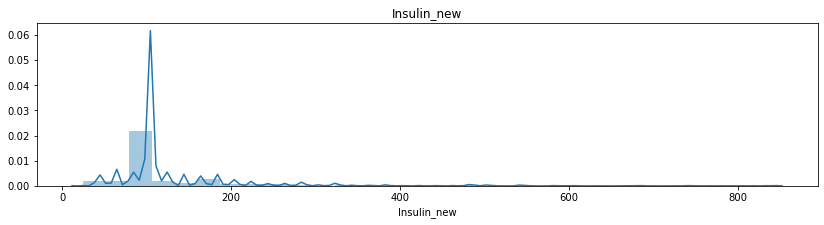

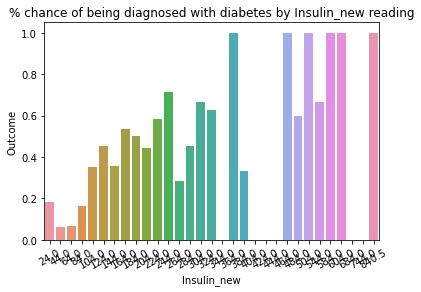

In [12]:
var = var+'_new'
plt.figure(figsize=(14,3))

sns.distplot(df[var],bins=30)#, ax = axes[p])
plt.title(var)
plt.show()
# 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
bp_pivot = df.groupby(var).Outcome.mean().reset_index()
sns.barplot(bp_pivot[var], bp_pivot.Outcome)
plt.xticks(rotation=30)
plt.title('% chance of being diagnosed with diabetes by {0} reading'.format(var))
plt.show()



In [13]:
var = 'BloodPressure'
dist = list(range(df[var].min(), df[var].max(),5))
#print(insulin_dist)
dist.append(df[var].max()+1)


df[var+'_new'] = np.nan


for i in range(len(dist)-1):
    msk = (df[var]>=dist[i])&(df[var]<dist[i+1])
    df[var+'_new'][msk] = (dist[i]+dist[i+1])/2
    
df.head()

<ipython-input-13-c4ef51d9786b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_new'][msk] = (dist[i]+dist[i+1])/2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_new,BloodPressure_new
0,6,148,72,35,105,33.6,0.627,50,1,104.0,71.5
1,1,85,66,29,105,26.6,0.351,31,0,104.0,66.5
2,8,183,64,32,105,23.3,0.672,32,1,104.0,66.5
3,1,89,66,23,94,28.1,0.167,21,0,104.0,66.5
4,0,137,40,35,168,43.1,2.288,33,1,164.0,41.5


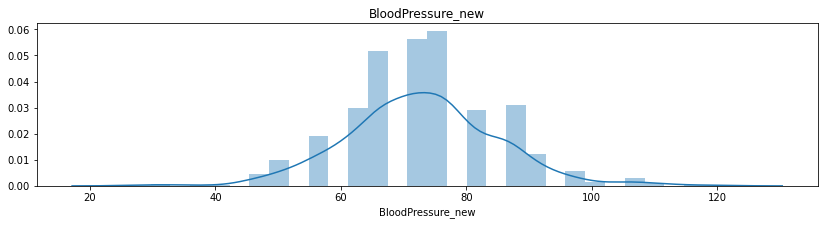

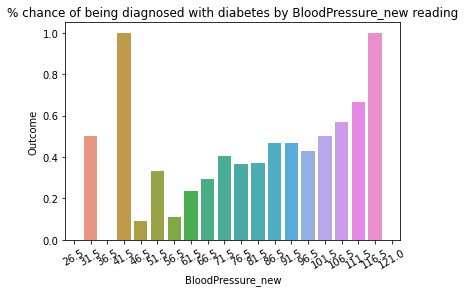

In [14]:
var = var+'_new'
plt.figure(figsize=(14,3))

sns.distplot(df[var],bins=30)#, ax = axes[p])
plt.title(var)
plt.show()
# 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
bp_pivot = df.groupby(var).Outcome.mean().reset_index()
sns.barplot(bp_pivot[var], bp_pivot.Outcome)
plt.xticks(rotation=30)
plt.title('% chance of being diagnosed with diabetes by {0} reading'.format(var))
plt.show()



In [15]:
var = 'Glucose'
dist = list(range(df[var].min(), df[var].max()+1,10))
#print(insulin_dist)
dist.append(df[var].max()+1)


df[var+'_new'] = np.nan


for i in range(len(dist)-1):
    msk = (df[var]>=dist[i])&(df[var]<dist[i+1])
    df[var+'_new'][msk] = (dist[i]+dist[i+1])/2
    
df.head()

<ipython-input-15-28d8e0cd8a29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_new'][msk] = (dist[i]+dist[i+1])/2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_new,BloodPressure_new,Glucose_new
0,6,148,72,35,105,33.6,0.627,50,1,104.0,71.5,149.0
1,1,85,66,29,105,26.6,0.351,31,0,104.0,66.5,89.0
2,8,183,64,32,105,23.3,0.672,32,1,104.0,66.5,179.0
3,1,89,66,23,94,28.1,0.167,21,0,104.0,66.5,89.0
4,0,137,40,35,168,43.1,2.288,33,1,164.0,41.5,139.0


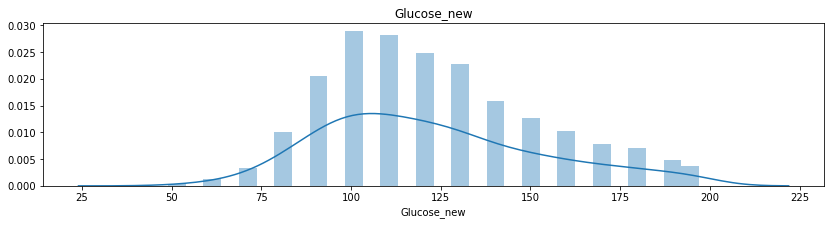

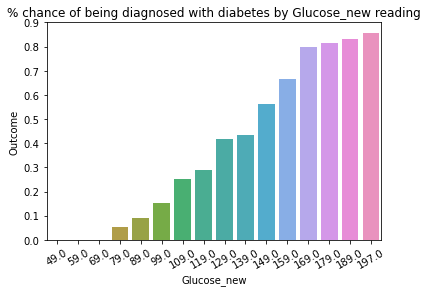

In [16]:
var = var+'_new'
plt.figure(figsize=(14,3))

sns.distplot(df[var],bins=30)#, ax = axes[p])
plt.title(var)
plt.show()
# 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
bp_pivot = df.groupby(var).Outcome.mean().reset_index()
sns.barplot(bp_pivot[var], bp_pivot.Outcome)
plt.xticks(rotation=30)
plt.title('% chance of being diagnosed with diabetes by {0} reading'.format(var))
plt.show()

In [17]:
var = 'BMI'
dist = list(range(int(df[var].min()), int(df[var].max()),2))
dist.append(df[var].max()+1)


df[var+'_new'] = np.nan


for i in range(len(dist)-1):
    msk = (df[var]>=dist[i])&(df[var]<dist[i+1])
    df[var+'_new'][msk] = (dist[i]+dist[i+1])/2
    
df.head()

<ipython-input-17-005832663ae7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_new'][msk] = (dist[i]+dist[i+1])/2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_new,BloodPressure_new,Glucose_new,BMI_new
0,6,148,72,35,105,33.6,0.627,50,1,104.0,71.5,149.0,33.0
1,1,85,66,29,105,26.6,0.351,31,0,104.0,66.5,89.0,27.0
2,8,183,64,32,105,23.3,0.672,32,1,104.0,66.5,179.0,23.0
3,1,89,66,23,94,28.1,0.167,21,0,104.0,66.5,89.0,29.0
4,0,137,40,35,168,43.1,2.288,33,1,164.0,41.5,139.0,43.0


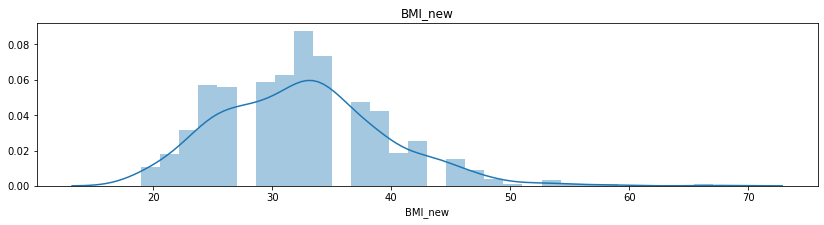

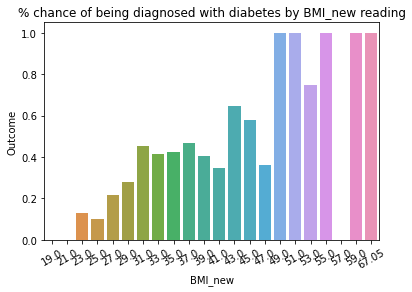

In [18]:
var = var+'_new'
plt.figure(figsize=(14,3))

sns.distplot(df[var],bins=30)#, ax = axes[p])
plt.title(var)
plt.show()
# 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
bp_pivot = df.groupby(var).Outcome.mean().reset_index()
sns.barplot(bp_pivot[var], bp_pivot.Outcome)
plt.xticks(rotation=30)
plt.title('% chance of being diagnosed with diabetes by {0} reading'.format(var))
plt.show()

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Insulin_new',
       'BloodPressure_new', 'Glucose_new', 'BMI_new'],
      dtype='object')

In [20]:
var = 'DiabetesPedigreeFunction'
print(df[var].min(),df[var].max())
dist = list(np.arange(df[var].min(), df[var].max(),(df[var].max()-df[var].min())/30))
dist.append(df[var].max()+0.05)

#print(insulin_dist)

df[var+'_new'] = np.nan


for i in range(len(dist)-1):
    msk = (df[var]>=dist[i])&(df[var]<dist[i+1])
    df[var+'_new'][msk] = (dist[i]+dist[i+1])/2
    
df.head()

0.078 2.42


<ipython-input-20-7de6bb686962>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_new'][msk] = (dist[i]+dist[i+1])/2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_new,BloodPressure_new,Glucose_new,BMI_new,DiabetesPedigreeFunction_new
0,6,148,72,35,105,33.6,0.627,50,1,104.0,71.5,149.0,33.0,0.663500
1,1,85,66,29,105,26.6,0.351,31,0,104.0,66.5,89.0,27.0,0.351233
2,8,183,64,32,105,23.3,0.672,32,1,104.0,66.5,179.0,23.0,0.663500
3,1,89,66,23,94,28.1,0.167,21,0,104.0,66.5,89.0,29.0,0.195100
4,0,137,40,35,168,43.1,2.288,33,1,164.0,41.5,139.0,43.0,2.302900


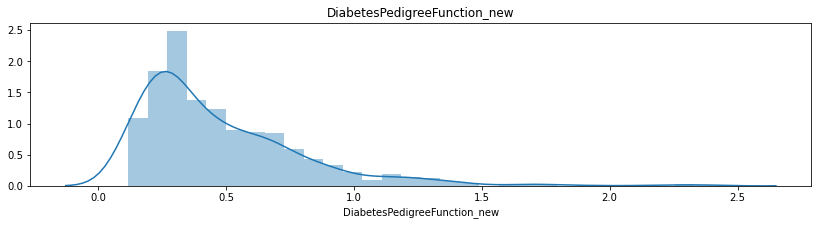

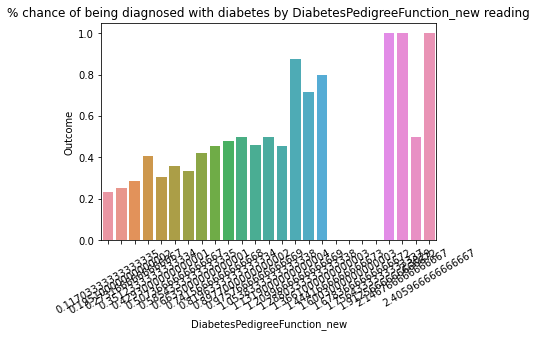

In [21]:
var = var+'_new'
plt.figure(figsize=(14,3))

sns.distplot(df[var],bins=30)#, ax = axes[p])
plt.title(var)
plt.show()
# 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
bp_pivot = df.groupby(var).Outcome.mean().reset_index()
sns.barplot(bp_pivot[var], bp_pivot.Outcome)
plt.xticks(rotation=30)
plt.title('% chance of being diagnosed with diabetes by {0} reading'.format(var))
plt.show()

In [22]:
var = 'Age'
print(df[var].min(),df[var].max())
dist = list(np.arange(df[var].min(),df[var].max(), 3))
dist.append(df[var].max()+1)

#print(insulin_dist)

df[var+'_new'] = np.nan


for i in range(len(dist)-1):
    msk = (df[var]>=dist[i])&(df[var]<dist[i+1])
    df[var+'_new'][msk] = (dist[i]+dist[i+1])/2
    
df.head()

21 81


<ipython-input-22-63529914f3f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_new'][msk] = (dist[i]+dist[i+1])/2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_new,BloodPressure_new,Glucose_new,BMI_new,DiabetesPedigreeFunction_new,Age_new
0,6,148,72,35,105,33.6,0.627,50,1,104.0,71.5,149.0,33.0,0.663500,49.5
1,1,85,66,29,105,26.6,0.351,31,0,104.0,66.5,89.0,27.0,0.351233,31.5
2,8,183,64,32,105,23.3,0.672,32,1,104.0,66.5,179.0,23.0,0.663500,31.5
3,1,89,66,23,94,28.1,0.167,21,0,104.0,66.5,89.0,29.0,0.195100,22.5
4,0,137,40,35,168,43.1,2.288,33,1,164.0,41.5,139.0,43.0,2.302900,34.5


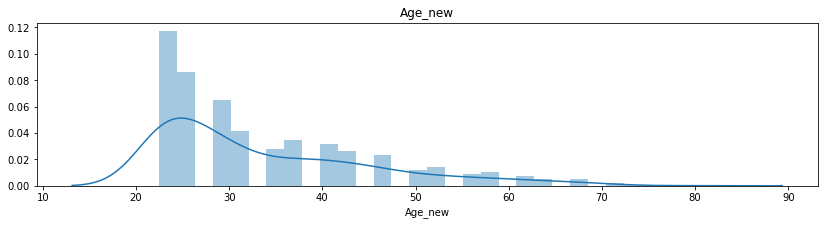

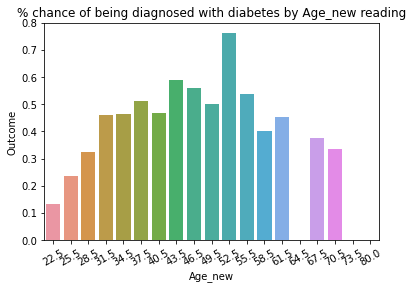

In [23]:
var = var+'_new'
plt.figure(figsize=(14,3))

sns.distplot(df[var],bins=30)#, ax = axes[p])
plt.title(var)
plt.show()
# 각 혈압마다 당뇨인 사람(1)과 정상인(0)의 비율
bp_pivot = df.groupby(var).Outcome.mean().reset_index()
sns.barplot(bp_pivot[var], bp_pivot.Outcome)
plt.xticks(rotation=30)
plt.title('% chance of being diagnosed with diabetes by {0} reading'.format(var))
plt.show()

In [24]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix

(768, 15)
(614, 15)
(154, 15)


In [26]:
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features= ['Age','Insulin_new','BloodPressure_new','Glucose_new','BMI_new','SkinThickness','DiabetesPedigreeFunction']
print(features)
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

['Age', 'Insulin_new', 'BloodPressure_new', 'Glucose_new', 'BMI_new', 'SkinThickness', 'DiabetesPedigreeFunction']
K nearest neighbors  mean accuracy:  73.612 % std:  0.136 %
Decision Tree Classifier  mean accuracy:  63.846 % std:  0.354 %
SVM classifier with RBF kernel  mean accuracy:  75.243 % std:  0.028 %
SVM classifier with linear kernel  mean accuracy:  77.04 % std:  0.034 %
Gaussian Naive Bayes  mean accuracy:  76.22 % std:  0.073 %


In [27]:
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features= ['Age','Insulin','BloodPressure_new','Glucose_new','BMI_new','SkinThickness','DiabetesPedigreeFunction']
print(features)
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]


classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

['Age', 'Insulin', 'BloodPressure_new', 'Glucose_new', 'BMI_new', 'SkinThickness', 'DiabetesPedigreeFunction']
K nearest neighbors  mean accuracy:  73.449 % std:  0.141 %
Decision Tree Classifier  mean accuracy:  68.409 % std:  0.17 %
SVM classifier with RBF kernel  mean accuracy:  75.568 % std:  0.03 %
SVM classifier with linear kernel  mean accuracy:  77.04 % std:  0.034 %
Gaussian Naive Bayes  mean accuracy:  75.895 % std:  0.065 %


In [28]:
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features= ['Age','Insulin','Insulin_new','Glucose','BloodPressure_new','Glucose_new','BMI_new','SkinThickness']
print(features)
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]


classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    print(cv_scores)
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

['Age', 'Insulin', 'Insulin_new', 'Glucose', 'BloodPressure_new', 'Glucose_new', 'BMI_new', 'SkinThickness']
[0.71544715 0.7804878  0.74796748 0.66666667 0.74590164]
K nearest neighbors  mean accuracy:  73.129 % std:  0.147 %
[0.69105691 0.67479675 0.79674797 0.65853659 0.78688525]
Decision Tree Classifier  mean accuracy:  72.16 % std:  0.34 %
[0.75609756 0.7804878  0.71544715 0.73170732 0.74590164]
SVM classifier with RBF kernel  mean accuracy:  74.593 % std:  0.049 %
[0.77235772 0.75609756 0.74796748 0.74796748 0.78688525]
SVM classifier with linear kernel  mean accuracy:  76.226 % std:  0.023 %
[0.76422764 0.75609756 0.74796748 0.73170732 0.73770492]
Gaussian Naive Bayes  mean accuracy:  74.754 % std:  0.014 %


In [29]:
from collections import deque

def dfs(features, seq, n,result):
    if len(seq) >= 4 : 
        result.append(seq.copy())
    for i in range(n,len(features)):
        if visited[i]==0:
            visited[i]=1
            seq.append(features[i])
            dfs(features,seq,i,result)
            seq.pop(-1)
            visited[i]=0
        
        


In [30]:
columns=df.columns.to_list()
columns.remove('Outcome')
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin_new',
 'BloodPressure_new',
 'Glucose_new',
 'BMI_new',
 'DiabetesPedigreeFunction_new',
 'Age_new']

In [31]:
visited=[0 for _ in range(16)]
selected=[]
cv_scores = 0 
result= []
dfs(columns,[],0,result)

In [32]:
print(len(result))


15914


In [33]:
cv_scores = 0
clf= SVC(kernel='linear')
clf_name = 'SVM classifier with linear kernel'
for i in range(100):
    features = result[i]
    if i%50==0: print('{0}// {1}'.format(i,len(result)))
    temp = cross_val_score(clf, train[features], train[target], cv=5)
    temp1 = round(temp.mean()*100, 3)
    if temp1>cv_scores:
        cv_scores = temp1
        print(clf_name, ' mean accuracy: ', cv_scores, '% std: ', round(temp.var()*100, 3),'%')
        best_features = features


0// 15914
SVM classifier with linear kernel  mean accuracy:  74.106 % std:  0.079 %
SVM classifier with linear kernel  mean accuracy:  74.269 % std:  0.077 %
SVM classifier with linear kernel  mean accuracy:  76.873 % std:  0.038 %
SVM classifier with linear kernel  mean accuracy:  77.037 % std:  0.056 %
SVM classifier with linear kernel  mean accuracy:  77.529 % std:  0.047 %
SVM classifier with linear kernel  mean accuracy:  78.014 % std:  0.023 %
50// 15914


In [75]:
clf= SVC(kernel='linear')
clf_name = 'SVM classifier with linear kernel'
for i in range(100,200):
    features = result[i]
    if i%50==0: print('{0}// {1}'.format(i,len(result)))
    temp = cross_val_score(clf, train[features], train[target], cv=5)
    temp1 = round(temp.mean()*100, 3)
    if temp1>cv_scores:
        cv_scores = temp1
        print(clf_name, ' mean accuracy: ', cv_scores, '% std: ', round(temp.var()*100, 3),'%')
        best_features = features



100// 15914
SVM classifier with linear kernel  mean accuracy:  78.338 % std:  0.205 %
150// 15914


In [86]:
print(best_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure_new', 'Glucose_new', 'DiabetesPedigreeFunction_new', 'Age_new']


In [96]:
train, test = train_test_split(df, test_size=0.2)
print(df.shape)
print(train.shape)
print(test.shape)

(768, 15)
(614, 15)
(154, 15)


In [101]:
final_model_smv_lin = SVC(kernel='linear').fit(train[features], train[target])
#final_model_gnb = gnb().fit(train[features], train[target])

test accuracy for SVM classifier with a linear kernel: 77.92 %


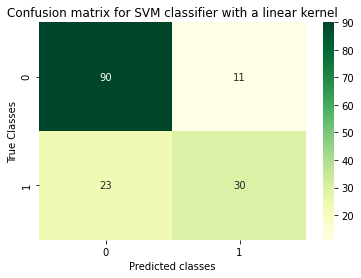

In [102]:
y_hat_svm = final_model_smv_lin.predict(test[features])

print('test accuracy for SVM classifier with a linear kernel:'\
      , round(accuracy_score(test[target], y_hat_svm)*100, 2), '%')
plt.title('Confusion matrix for SVM classifier with a linear kernel')
sns.heatmap(confusion_matrix(test[target], y_hat_svm), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


In [106]:
## mean accuracy 는 높아졌는데 test accuracy가 안높아지는 이유??



K nearest neighbors  mean accuracy:  71.493 % std:  0.038 %
Decision Tree Classifier  mean accuracy:  67.261 % std:  0.072 %
SVM classifier with RBF kernel  mean accuracy:  74.758 % std:  0.083 %
SVM classifier with linear kernel  mean accuracy:  76.224 % std:  0.103 %
Gaussian Naive Bayes  mean accuracy:  75.247 % std:  0.035 %


In [100]:
Counter(df['Outcome'])

Counter({1: 268, 0: 500})